In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np
from transforms import Affine, PReLU, Planar, Radial
from flows import Flow
tfd = tfp.distributions

In [2]:
k = 2
n_layers = 4
affine = Affine(input_dims=k)
prelu = PReLU()
planar = Planar(k)
radial = Radial(k)
transform = radial
for i in range(n_layers - 1):
    transform = radial(transform)

In [3]:
base_dist = tfd.MultivariateNormalDiag(loc=tf.zeros((k,)))

In [4]:
flow = Flow(base_dist, transform, name='affine_gaussian')

In [5]:
x1_samples = tfd.Normal(loc=2.0, scale=1.0).sample(1024)
x2_samples = tfd.Normal(loc=2.0*x1_samples**2.0, scale=0.5*tf.ones(x1_samples.shape)).sample()
x_samples = tf.stack([x2_samples, x1_samples], axis=1)

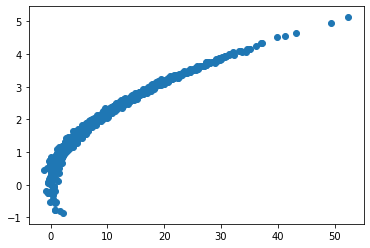

In [6]:
plt.scatter(x_samples[:,0], x_samples[:,1])

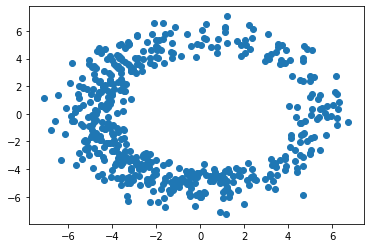

In [7]:
flow_dist_samples = flow.dist.sample(512)
plt.scatter(flow_dist_samples[:,0], flow_dist_samples[:,1])

In [8]:
print(x_samples[:1])
y = radial.forward(x_samples[:1])
print(y)
print(radial.inverse(y))
y = planar.forward(x_samples[:1])
print(y)
print(planar.inverse(y))

tf.Tensor([[4.6441917 1.3429323]], shape=(1, 2), dtype=float32)
tf.Tensor([[5.608596  1.5985425]], shape=(1, 2), dtype=float32)
tf.Tensor([[4.6441917 1.3429323]], shape=(1, 2), dtype=float32)
tf.Tensor([[5.341443  2.0401835]], shape=(1, 2), dtype=float32)
tf.Tensor([[4.6441917 1.3429323]], shape=(1, 2), dtype=float32)


In [9]:
print(radial.inverse_log_det_jacobian(radial.forward(x_samples[:1]), event_ndims=1))

tf.Tensor([[-5.858799]], shape=(1, 1), dtype=float32)


In [10]:
for i in range(1000000):
    log_loss, grads = flow.train_on_batch(x_samples)
    if i % 1000 == 0:
        print(f'(iteration {i}) log loss: {log_loss.numpy()}  vars/grads: {list(zip(map(lambda v: v.name, flow.trainable_variables), map(lambda g: g.numpy(), grads)))}')
    if i % 10000 == 0:
        samples = flow.dist.sample(512)
        plt.scatter(samples[:,0], samples[:,1])
        plt.show()

NotImplementedError: numpy() is only available when eager execution is enabled.